In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shuvoalok/raf-db-dataset")

print("Path to dataset files:", path)

100%|██████████| 37.7M/37.7M [00:02<00:00, 19.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shuvoalok/raf-db-dataset/versions/2


In [2]:
# Desglose de datos de entrenamiento y testeo
import os

dataset_path = path
files = os.listdir(dataset_path)
print('Los archivos dentro del path son: ',files) # ['DATASET', 'test_labels.csv', 'train_labels.csv']

images_path = os.path.join(dataset_path, "DATASET")
image_files = os.listdir(images_path)
print(image_files[:4])  # ['test', 'train'] No hay datos de validacion

test_path = os.path.join(images_path, "test")
train_path = os.path.join(images_path, "train")

print("Clases en train:", os.listdir(train_path))
print("Clases en test:", os.listdir(test_path))

Los archivos dentro del path son:  ['train_labels.csv', 'DATASET', 'test_labels.csv']
['train', 'test']
Clases en train: ['6', '7', '5', '4', '2', '3', '1']
Clases en test: ['6', '7', '5', '4', '2', '3', '1']


In [3]:
#Numero de datos de test y train
train_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in os.listdir(train_path)}
test_counts = {cls: len(os.listdir(os.path.join(test_path, cls))) for cls in os.listdir(test_path)}

print("Cantidad de imágenes en train:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")


print("\nCantidad de imágenes en validation:")
for cls, count in test_counts.items():
    print(f"{cls}: {count}")



Cantidad de imágenes en train:
6: 705
7: 2524
5: 1982
4: 4772
2: 281
3: 717
1: 1290

Cantidad de imágenes en validation:
6: 162
7: 680
5: 478
4: 1185
2: 74
3: 160
1: 329


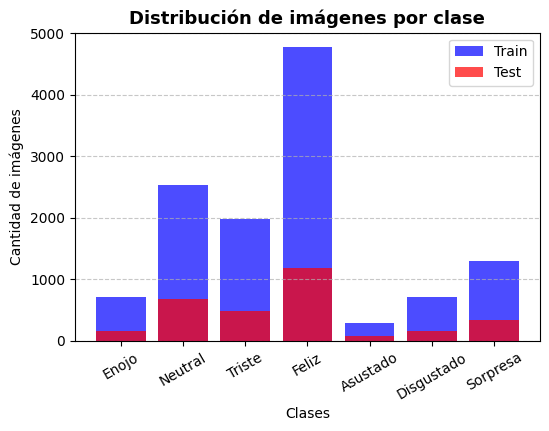

In [19]:
# Histograma
import matplotlib.pyplot as plt


''' 1. Asombro
    2. Asustado
    3. Disgusto
    4. Felicidad
    5. Tristeza
    6. Enojo
    7. Neutral
    '''
label_map = {
    "1": "Sorpresa",
    "2": "Asustado",
    "3": "Disgustado",
    "4": "Feliz",
    "5": "Triste",
    "6": "Enojo",
    "7": "Neutral"}
# Cambio de etiquetas
train_labels = [label_map.get(cls, cls) for cls in train_counts.keys()]
test_labels = [label_map.get(cls, cls) for cls in test_counts.keys()]
# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(train_labels, train_counts.values(), alpha=0.7, label="Train", color='b')
plt.bar(test_labels, test_counts.values(), alpha=0.7, label="Test", color='r')

# Etiquetas y título
plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de imágenes por clase", fontsize=13, fontweight='semibold')
plt.xticks(rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
pdf_path = "DistribucionClases_RAFDB.pdf"
plt.savefig(pdf_path, format="pdf", bbox_inches="tight")
# Mostrar gráfico
plt.show()

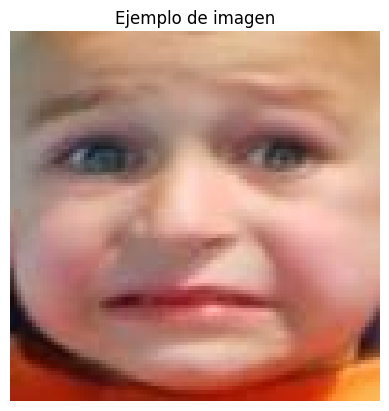

In [5]:
# Ejemplos de imágens por clase
import cv2
import random

# Seleccionar una imagen aleatoria de la clase 'angry'
angry_path = os.path.join(train_path, "2")
angry_images = os.listdir(angry_path)

if angry_images:  # Verifica que haya imágenes en la carpeta
    sample_image = random.choice(angry_images)  # Selecciona una imagen aleatoria
    image_path = os.path.join(angry_path, sample_image)

    # Cargar y convertir a RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar imagen
    plt.imshow(image)
    plt.axis("off")
    plt.title("Ejemplo de imagen")
    plt.show()


In [6]:
# COMPROBAR DIMENSIONES DE IMAGENES ( EN CASO DE REDIMENSIONAR ES UNA DESVENTAJA PARA EL DATASET)
import numpy as np

image_sizes = []

for cls in os.listdir(train_path):
    class_path = os.path.join(train_path, cls)
    sample_images = os.listdir(class_path)[:10]  # Analizar solo 10 imágenes por clase
    for img_name in sample_images:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])  # (Alto, Ancho)

# Convertir a array de NumPy
image_sizes = np.array(image_sizes)

# Mostrar estadísticas
print(f"Dimensión mínima: {image_sizes.min(axis=0)}")
print(f"Dimensión máxima: {image_sizes.max(axis=0)}")
print(f"Dimensión promedio: {image_sizes.mean(axis=0)}")

Dimensión mínima: [100 100]
Dimensión máxima: [100 100]
Dimensión promedio: [100. 100.]


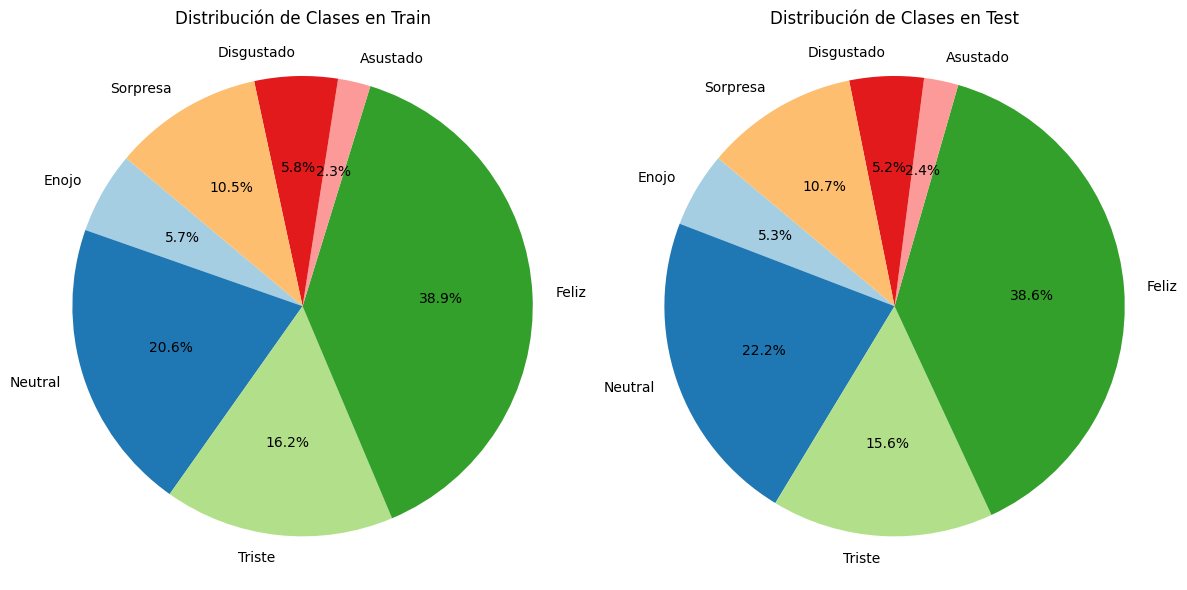

In [7]:
# BALANCE DE CLASES
import pandas as pd

# Convertir los conteos en DataFrame
df_counts = pd.DataFrame({"Clase": list(train_counts.keys()),
                          "Train": list(train_counts.values()),
                          "Test": list(test_counts.values())})

# Calcular porcentaje
df_counts["% Train"] = (df_counts["Train"] / df_counts["Train"].sum()) * 100
df_counts["% Test"] = (df_counts["Test"] / df_counts["Test"].sum()) * 100

#print(df_counts)
# GRAFICO DE TORTA CON BALANCE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Gráfico de Train
axes[0].pie(df_counts["% Train"], labels=train_labels, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title("Distribución de Clases en Train")
axes[0].axis("equal")  # Para que el círculo no se deforme

# Gráfico de Validation
axes[1].pie(df_counts["% Test"], labels=test_labels, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title("Distribución de Clases en Test")
axes[1].axis("equal")  # Para que el círculo no se deforme

plt.tight_layout()
plt.savefig('BalanceClases_datasetRAF.pdf', format="pdf", bbox_inches="tight") # guardar
# Mostrar gráficos
plt.show()

In [8]:
# Calculo de ratio de desbalance
train_ratio = df_counts["Train"].max() / df_counts["Train"].min()
test_ratio = df_counts["Test"].max() / df_counts["Test"].min()
print(f"Ratio de desbalance en Train (mayor / menor): {train_ratio:.2f}")
print(f"Ratio de desbalance en Test (mayor / menor): {test_ratio:.2f}")

Ratio de desbalance en Train (mayor / menor): 16.98
Ratio de desbalance en Test (mayor / menor): 16.01


In [9]:
# ANÁLISIS DE IMAGENES DUPLICADAS
import hashlib

def get_image_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

hashes = set()
duplicates = []

for cls in os.listdir(train_path):
    class_path = os.path.join(train_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img_hash = get_image_hash(img_path)
        if img_hash in hashes:
            duplicates.append(img_path)
        else:
            hashes.add(img_hash)

print(f"Se encontraron {len(duplicates)} imágenes duplicadas.")

Se encontraron 2 imágenes duplicadas.


In [10]:
# COMPROBAR ARCHIVOS / DATOS / IMAGENES CORRUPTOS
corrupt_images = []

for cls in os.listdir(train_path):
    class_path = os.path.join(train_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                corrupt_images.append(img_path)
        except:
            corrupt_images.append(img_path)

print(f"Se encontraron {len(corrupt_images)} imágenes corruptas.")

Se encontraron 0 imágenes corruptas.


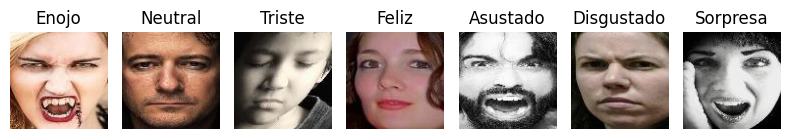

In [18]:
# COLLAGE PRUEBA
# Obtener las clases
classes = os.listdir(train_path)
num_classes = len(classes)

# Crear figura para el collage
fig, axes = plt.subplots(1, num_classes, figsize=(8, 4))  # Ajusta el tamaño según necesites

for i, cls in enumerate(classes):
    class_path = os.path.join(train_path, cls)
    img_name = random.choice(os.listdir(class_path))  # Selecciona imagen aleatoria
    img_path = os.path.join(class_path, img_name)

    # Cargar imagen
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostrar en la figura
    axes[i].imshow(img)

    label = train_labels[i] if i < len(train_labels) else cls
    axes[i].set_title(label)
    axes[i].axis("off")  # Quitar ejes

# Ajustar el diseño
plt.tight_layout()
plt.savefig('CollageClases_datasetRAF.pdf', format="pdf", bbox_inches="tight") # guardar
# Mostrar collage
plt.show()


# **AHORA SE ANALIZAN LAS OTRAS CARPETAS DEL DATASET**
---



In [12]:
# Desglose de datos de entrenamiento y testeo
import os

dataset_path = path
files = os.listdir(dataset_path)
print('Los archivos dentro del path son: ',files) # ['DATASET', 'test_labels.csv', 'train_labels.csv']
# Cargar los archivos CSV
train_csv_path = os.path.join(dataset_path, 'train_labels.csv')
test_csv_path = os.path.join(dataset_path, 'test_labels.csv')

# Leer los archivos y mostrar un resumen
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

print("Contenido de train_labels.csv:")
print(train_df.head())

print("\nColumnas disponibles en train_labels.csv:")
print(train_df.columns)

print("\nContenido de test_labels.csv:")
print(test_df.head())

print("\nColumnas disponibles en test_labels.csv:")
print(test_df.columns)
print('*************************************************************************')

# Para train_labels.csv
train_label_counts = train_df.iloc[:, 1].value_counts()
print("Cantidad de imágenes por etiqueta (train):")
print(train_label_counts)

# Para test_labels.csv
test_label_counts = test_df.iloc[:, 1].value_counts()
print("\nCantidad de imágenes por etiqueta (test):")
print(test_label_counts)


Los archivos dentro del path son:  ['train_labels.csv', 'DATASET', 'test_labels.csv']
Contenido de train_labels.csv:
                     image  label
0  train_00001_aligned.jpg      5
1  train_00002_aligned.jpg      5
2  train_00003_aligned.jpg      4
3  train_00004_aligned.jpg      4
4  train_00005_aligned.jpg      5

Columnas disponibles en train_labels.csv:
Index(['image', 'label'], dtype='object')

Contenido de test_labels.csv:
                   image  label
0  test_0001_aligned.jpg      5
1  test_0002_aligned.jpg      1
2  test_0003_aligned.jpg      4
3  test_0004_aligned.jpg      1
4  test_0005_aligned.jpg      5

Columnas disponibles en test_labels.csv:
Index(['image', 'label'], dtype='object')
*************************************************************************
Cantidad de imágenes por etiqueta (train):
label
4    4772
7    2524
5    1982
1    1290
3     717
6     705
2     281
Name: count, dtype: int64

Cantidad de imágenes por etiqueta (test):
label
4    1185
7     680

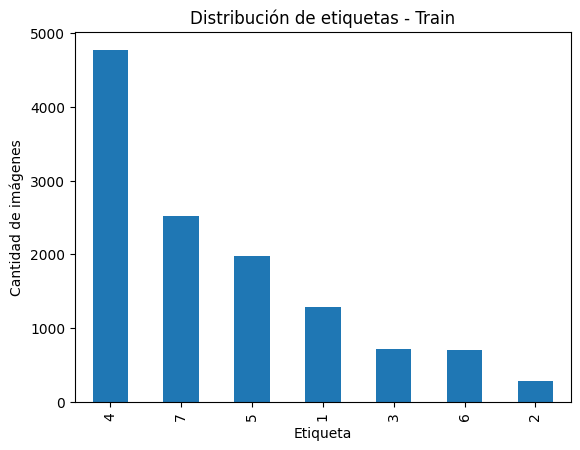

In [13]:

train_label_counts.plot(kind='bar', title='Distribución de etiquetas - Train')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de imágenes')
plt.show()